### 1. Importing Libraries

In [1]:
# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
from Scripts.unicodedata import category

warnings.filterwarnings('ignore')# To keep the output clean from warnings, can be removed if demonstration.
pd.set_option('display.max_columns', None) # Display all columns in DataFrames
sns.set_theme(style="whitegrid")

### 2. Reading Data

In [2]:
df = pd.read_csv('../data/customer_sentiment.csv')
# Display basic information
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"\nData Attributes:\n{list(df.columns)}")

Shape: 25000 rows x 13 columns

Data Attributes:
['customer_id', 'gender', 'age_group', 'region', 'product_category', 'purchase_channel', 'platform', 'customer_rating', 'review_text', 'sentiment', 'response_time_hours', 'issue_resolved', 'complaint_registered']


### 3. EDA - Part 1: Basic Exploration and Summary Statistics
1. Display first 5 rows of the dataset
2. Display dataset information
3. Display basic statistics for numerical columns
4. Check for missing values

In [3]:
# data_overview: List of tuples containing (section title, display function)
data_overview = [
    ("FIRST 5 ROWS", lambda: display(df.head())),
    ("DATASET INFO", lambda: df.info()),
    ("STATISTICS SUMMARY", lambda: display(df.describe())),
    ("MISSING VALUES", lambda: print(df.isnull().sum()[df.isnull().sum() > 0]
                                     if df.isnull().any().any() else "No missing values found."))]
# Display each section with numbered headers
# 1 is tuple's elements index, to start the headers number from 1
for i, (title, func) in enumerate(data_overview, 1):
    print(f"\n{i} - {title}:")
    # call the lambda function to display the content
    func()


1 - FIRST 5 ROWS:


,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no



2 - DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           25000 non-null  int64 
 1   gender                25000 non-null  object
 2   age_group             25000 non-null  object
 3   region                25000 non-null  object
 4   product_category      25000 non-null  object
 5   purchase_channel      25000 non-null  object
 6   platform              25000 non-null  object
 7   customer_rating       25000 non-null  int64 
 8   review_text           25000 non-null  object
 9   sentiment             25000 non-null  object
 10  response_time_hours   25000 non-null  int64 
 11  issue_resolved        25000 non-null  object
 12  complaint_registered  25000 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB

3 - STATISTICS SUMMARY:


,customer_id,customer_rating,response_time_hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,3.002480,36.023480
std,7217.022701,1.404647,20.597941
min,1.000000,1.000000,1.000000
25%,6250.750000,2.000000,18.000000
50%,12500.500000,3.000000,36.000000
75%,18750.250000,4.000000,54.000000
max,25000.000000,5.000000,71.000000



4 - MISSING VALUES:
No missing values found.


### 4. Basic Data Quality Checks

In [4]:
# Function to check for duplicates
def check_duplicates(dataframe):
    duplicate_count = dataframe.duplicated().sum()
    print(f"Total Duplicates: {duplicate_count}")
    print(f"{'Warnings: Duplicates found!' if duplicate_count > 0 else 'No duplicates found.'}")

# function to check unique values in categorical columns
def check_unique_values(dataframe):
    categorical_attrs = dataframe.select_dtypes(include=['object', 'category']).columns
    for col in categorical_attrs:
        print(f"\nColumn:[{col}] has {dataframe[col].nunique()} unique values.")
        print(f"Values: {list(dataframe[col].unique())}")

# Sum of sentiment distribution. The sentiment col. will be ignored during modeling,
# but we decided to keep it for EDA purposes and use it later for performance evaluation.
def sentiment_distribution(dataframe):
    """ Display sentiment distribution """
    print(dataframe['sentiment'].value_counts())
    print("\nPercentages:",
          dataframe['sentiment'].value_counts(normalize=True).round(3) * 100)

# List of a tuples to hold the checks to be performed
data_quality_checks = [
    ("DUPLICATE CHECK", check_duplicates),
    ("UNIQUE VALUES IN CATEGORICAL COLUMNS", check_unique_values),
    ("CUSTOMER RATING DISTRIBUTION", lambda dataframe:print(dataframe['customer_rating'].value_counts().sort_index())),
    ("SENTIMENT DISTRIBUTION", sentiment_distribution)]

# Perform each data quality check with numbered headers
for i , (check_title, check_func) in enumerate(data_quality_checks, 1):
    print(f"\n{i} - {check_title}:")
    check_func(df)


1 - DUPLICATE CHECK:
Total Duplicates: 0
No duplicates found.

2 - UNIQUE VALUES IN CATEGORICAL COLUMNS:

Column:[gender] has 3 unique values.
Values: ['male', 'other', 'female']

Column:[age_group] has 5 unique values.
Values: ['60+', '46-60', '36-45', '18-25', '26-35']

Column:[region] has 5 unique values.
Values: ['north', 'central', 'east', 'south', 'west']

Column:[product_category] has 9 unique values.
Values: ['automobile', 'books', 'sports', 'groceries', 'electronics', 'travel', 'fashion', 'home & kitchen', 'beauty']

Column:[purchase_channel] has 1 unique values.
Values: ['online']

Column:[platform] has 20 unique values.
Values: ['flipkart', 'swiggy instamart', 'facebook marketplace', 'zepto', 'croma', 'amazon', 'shopclues', 'tata cliq', 'snapdeal', 'paytm mall', 'ajio', 'myntra', 'nykaa', 'reliance digital', 'meesho', 'bigbasket', 'lenskart', 'jiomart', 'others', 'boat']

Column:[review_text] has 15 unique values.
Values: ['very disappointed with the quality.', 'fast delive

### 5. EDA - Part 2: Visualizations
1. Rating Profile
2. Rating by Segments
3. Response Time by Rating

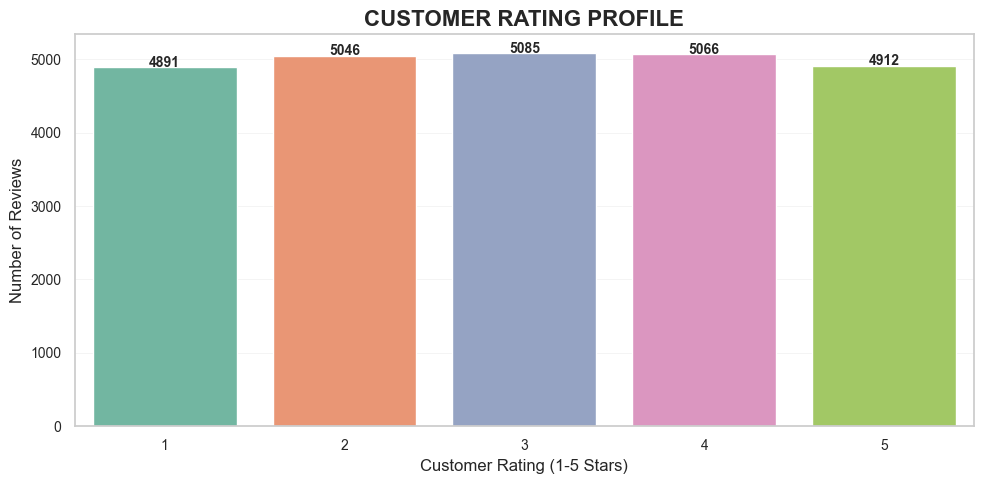

In [5]:
# Baseline - Customer Rating Profile
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='customer_rating', palette='Set2', order=[1, 2, 3, 4, 5])
plt.title('CUSTOMER RATING PROFILE', fontsize=16, fontweight='bold')
plt.xlabel('Customer Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_axisbelow(True)

# Add value labels on top of bars
rating_counts = df['customer_rating'].value_counts().sort_index()
for i, v in enumerate(rating_counts.to_list()):
    plt.text(i, v + 5, str(v), ha='center', fontweight
              ='bold', fontsize=10)
plt.tight_layout()
plt.show()

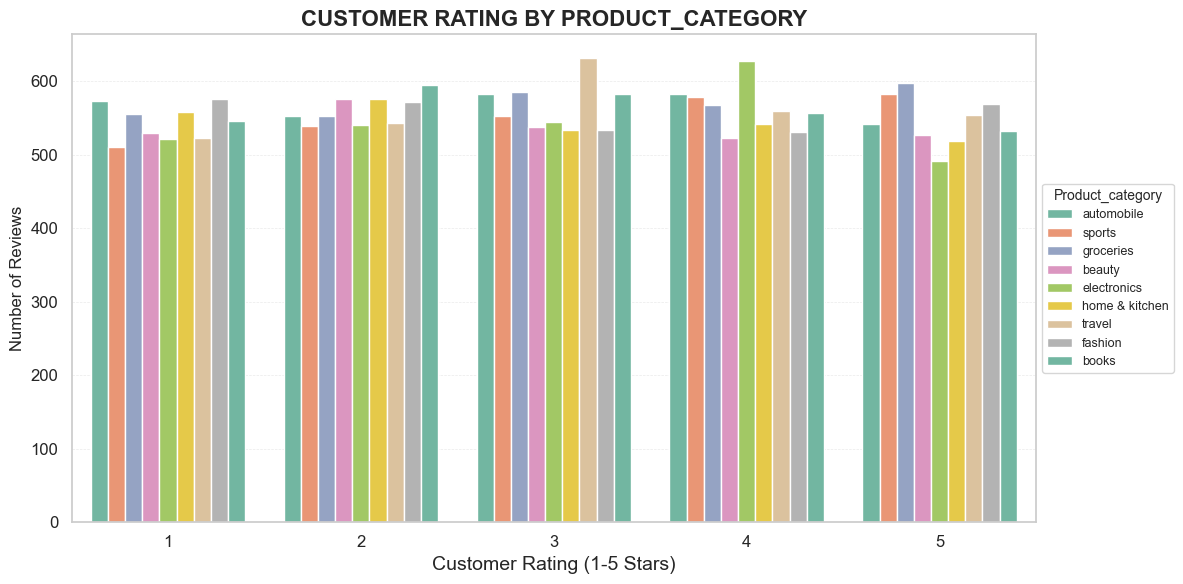

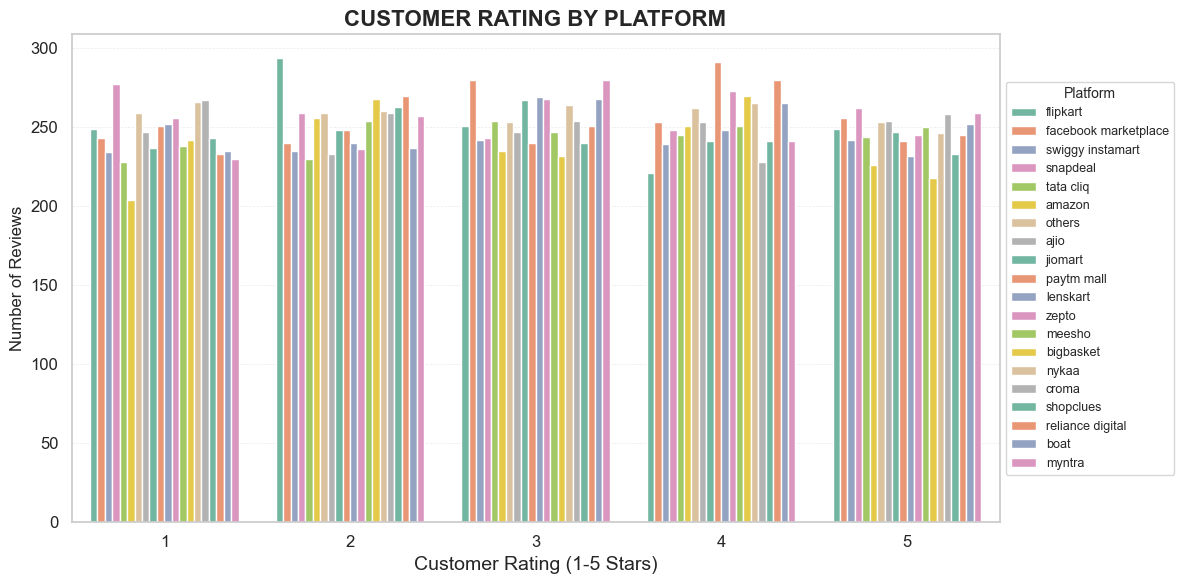

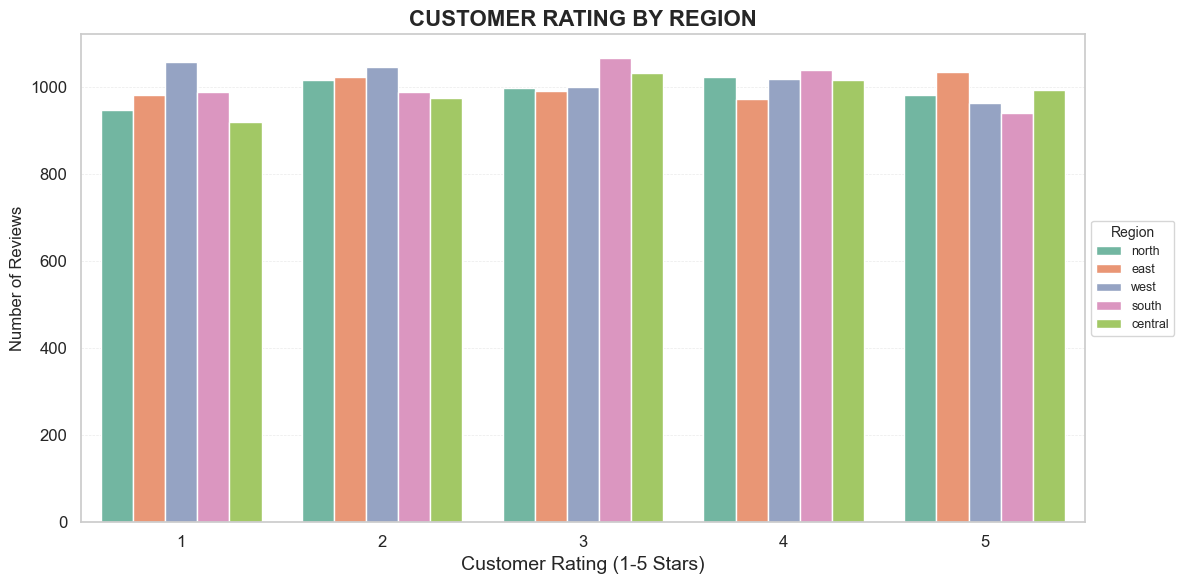

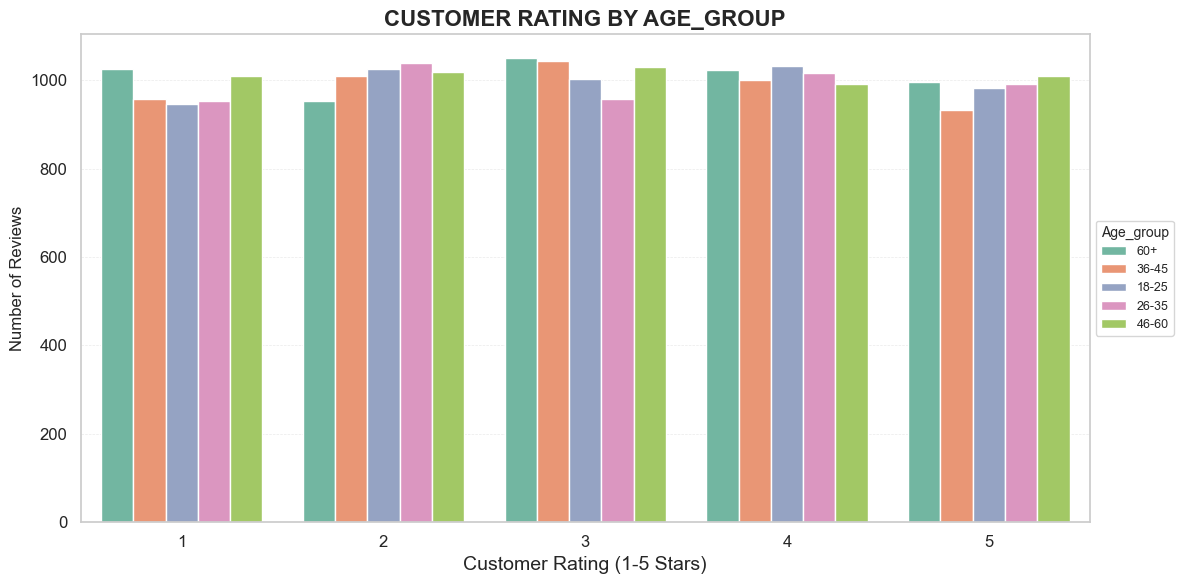

In [6]:
# Rating by Segments (product_category, platform, region, age_group)
segment_attrs = ['product_category', 'platform', 'region', 'age_group']
for attr in segment_attrs:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='customer_rating', hue=attr, palette='Set2', order=[1, 2, 3, 4, 5])
    plt.title(f'CUSTOMER RATING BY {attr.upper()}', fontsize=16, fontweight='bold')
    plt.xlabel('Customer Rating (1-5 Stars)', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().set_axisbelow(True)
    plt.legend(title=attr.capitalize(), fontsize=9, title_fontsize=10,
               loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

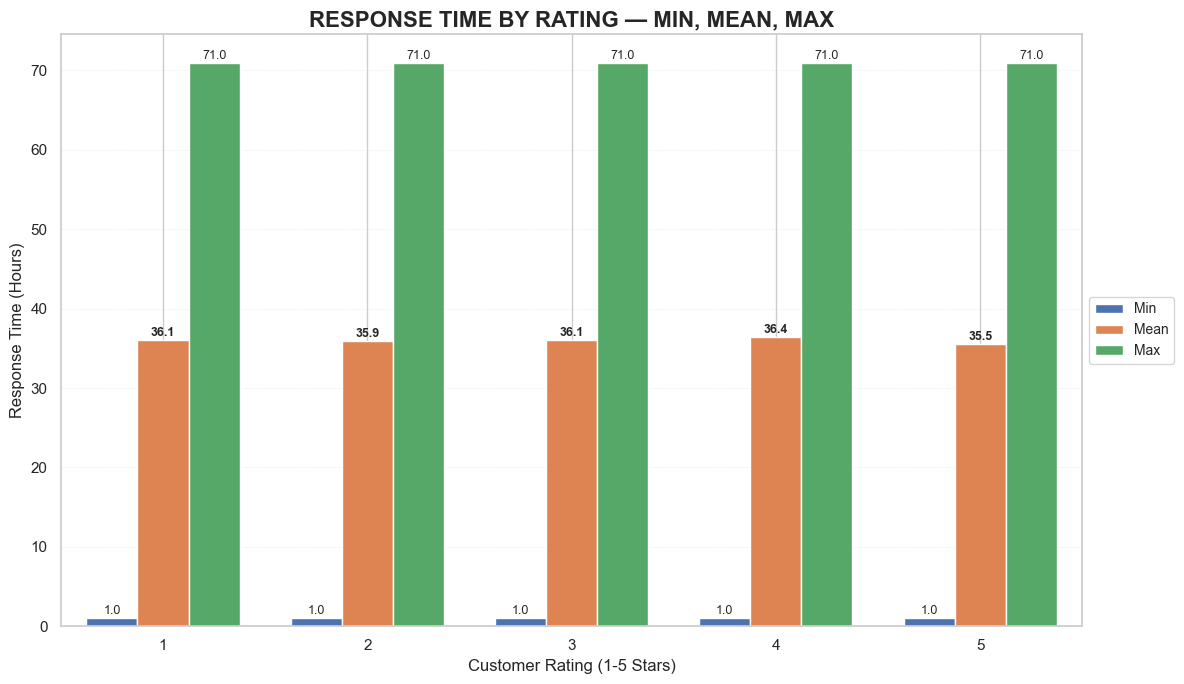

In [7]:
# Response Time by Rating (Min, Mean, Max)
# Aggregate statistics by rating
stats = df.groupby('customer_rating')['response_time_hours'].agg(['min', 'mean', 'max'])

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.25
x = np.arange(1, 6)  # Ratings 1-5

# Create bars
ax.bar(x - bar_width, stats['min'], width=bar_width, label='Min', color='C0')
ax.bar(x, stats['mean'], width=bar_width, label='Mean', color='C1')
ax.bar(x + bar_width, stats['max'], width=bar_width, label='Max', color='C2')

# Annotate bars with values
for i in range(len(x)):
    rating = x[i]
    if rating in stats.index:
        ax.text(x[i] - bar_width, stats.loc[rating, 'min'] + 0.5,
                f"{stats.loc[rating, 'min']:.1f}", ha='center', fontsize=9)
        ax.text(x[i], stats.loc[rating, 'mean'] + 0.5,
                f"{stats.loc[rating, 'mean']:.1f}", ha='center', fontsize=9, fontweight='bold')
        ax.text(x[i] + bar_width, stats.loc[rating, 'max'] + 0.5,
                f"{stats.loc[rating, 'max']:.1f}", ha='center', fontsize=9)

# Styling
ax.set_title('RESPONSE TIME BY RATING — MIN, MEAN, MAX', fontsize=16, fontweight='bold')
ax.set_xlabel('Customer Rating (1-5 Stars)', fontsize=12)
ax.set_ylabel('Response Time (Hours)', fontsize=12)
ax.set_xticks(x)
ax.set_xlim(0.5, 5.5)
ax.legend(fontsize=10,  loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()